.Proyecto para el Parcial 1 "Proyecto covid 19"
Por Uriel Brenis Aguilar
Rafael Melchor Hernandez


Actividad: 1

1 Cargar el dataset 

In [2]:
#importaciones
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
df = pd.read_csv('pacientes_covid.csv') #carga del csv con la funcion read_csv
df.head() #Muestra las primeras filas del DataFrame.

,ID,Edad,Sexo,Temperatura,Presion_Sistolica,Presion_Diastolica,Frecuencia_Cardiaca,Nivel_Oxigeno,Enfermo_COVID,Hospitalizado
0,1,52,Hombre,35.5,155,75,89,97,No,Sí
1,2,15,Hombre,38.1,142,66,73,93,Sí,No
2,3,72,Mujer,35.8,140,76,66,81,No,No
3,4,61,Hombre,38.6,128,82,76,88,Sí,No
4,5,21,Mujer,35.9,140,85,103,84,Sí,Sí


Actividad 2: 

2 Exploracion inicial
En la tabla se observan 10 columnas las cuales toman los valores de: ID: int64, Sexo: String, Temperatura: float64, Presion_Sistolica: int64, Presion_Diastolica: int64, Frecuencia_Cardiaca: int64, Nivel_Oxigeno: int64, Enfermo_COVID: bool, Hospitalizado: bool.
Ademas el csv cuenta con una dimension de 300 registros sinteticos.
En primeras filas podemos obsevar una muestra  heterogenea con una media de edad de 35.8 donde se muestra que hay mas hombres enfermos que mujeres asi que los mismos tiene un indice menor de ser hopitalizados copn respecto a las mujeres.


In [6]:
df.info() #Su propósito es darte un resumen rápido de la estructura de tus datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   300 non-null    int64  
 1   Edad                 300 non-null    int64  
 2   Sexo                 300 non-null    object 
 3   Temperatura          300 non-null    float64
 4   Presion_Sistolica    300 non-null    int64  
 5   Presion_Diastolica   300 non-null    int64  
 6   Frecuencia_Cardiaca  300 non-null    int64  
 7   Nivel_Oxigeno        300 non-null    int64  
 8   Enfermo_COVID        300 non-null    object 
 9   Hospitalizado        300 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 23.6+ KB


Actividad 3: 

3 Cálculos básicos con Pandas/Numpy

Número total de pacientes.
se utiliza la funcion "len()" para obtener la longitud del dataset

In [3]:
total_pacientes = len(df)
print("Número total de pacientes:", total_pacientes)


Número total de pacientes: 300


Promedio de edad. Se aplica la funcion mean() sobre la columna Edad para cualcular el promedio de los valores que contenga.

In [4]:
prom_edad = df["Edad"].mean()
print(f"Promedio de edad: {prom_edad:.2f} años")


Promedio de edad: 43.86 años


Paciente más joven y más viejo:
Se aplica la funcion min() y max() sobre la columna Edad para obtener el valor mas bajo y mas alto respectivamente,
contenido en la columna

In [3]:
edad_min = df["Edad"].min()
edad_max = df["Edad"].max()
print(f"Edad mínima: {edad_min} años")
print(f"Edad máxima: {edad_max} años") 


Edad mínima: 1 años
Edad máxima: 89 años


Promedio de temperatura. Se aplica la funcion mean() sobre la columna Temperatura para cualcular el promedio de los valores que contenga.
Nota: uso de f-string para imprimir la variable a 2 decimales

In [4]:
prom_temp = df["Temperatura"].mean()
print(prom_temp)
print(f"Promedio de temperatura: {prom_temp:.2f} °C")


36.994
Promedio de temperatura: 36.99 °C


Promedio de saturación de oxígeno en pacientes enfermos vs sanos. Para ambos casos, se obtienen aquellos registros donde en el apartado
"Enfermo_COVID" sean "Sí" o "No" segun sea el caso, para despues obtener sus respectivos promedios mediante mean() en la columuna (Nivel_Oxigeno).
Finalmete se redondea el resultado para obtener un porcentage entero

In [3]:
enfermos = df[df["Enfermo_COVID"] == "Sí"]
promedioEnfermos = enfermos["Nivel_Oxigeno"].mean()
print("Promedio de saturacion de oxigeno en pacientes enfermos: ",round(promedioEnfermos))
sanos = df[df["Enfermo_COVID"] == "No"]
promedioSanos = sanos["Nivel_Oxigeno"].mean()
print("Promedio de saturacion de oxigeno en pacientes sanos:",round(promedioSanos))

Promedio de saturacion de oxigeno en pacientes enfermos:  89
Promedio de saturacion de oxigeno en pacientes sanos: 89


Actividad 4:

4 Análisis demográfico y clínico

numero de mujeres sanas y enfermas.  en ambos casos,aplica una condicion logica donde para la columna sexo sea mujer y para
la columna Enfermo_COVID es a falso para el primer caso y verdadero para el segundo, se filtran los registros del DataFrame tomando solo aquellos donde Sexo es "Mujer" y, según el caso, Enfermo_COVID es "No" (sanas) o "Sí" (enfermas).
Este filtrado se hace con máscaras booleanas combinadas con el operador & para exigir que ambas condiciones se cumplan al mismo tiempo.
Luego, se obtiene el número de filas en cada subconjunto con len(...), guardando los resultados en m_sanas y m_enfermas.
Finalmente, se muestran los conteos usando f-strings para imprimir mensajes claros con los valores calculados

In [10]:
m_sanas = len(df[(df["Sexo"] == "Mujer") & (df["Enfermo_COVID"] == "No")])
m_enfermas = len(df[(df["Sexo"] == "Mujer") & (df["Enfermo_COVID"] == "Sí")])

print(f"El numero de mujeres sanas es: {m_sanas}")
print(f"El numero de mujeres enfermas  es: {m_enfermas}")

El numero de mujeres sanas es: 65
El numero de mujeres enfermas  es: 95


numero de hombres sanos y enfermos.  en ambos casos,aplica una condicion logica donde para la columna sexo sea hombre y para
la columna Enfermo_COVID es a falso para el primer caso y verdadero para el segundo, se filtran los registros del DataFrame para solo hombres (Sexo == "Hombre") y, según el caso, no enfermos (Enfermo_COVID == "No") o enfermos ("Sí").
El filtrado usa máscaras booleanas combinadas con & para que ambas condiciones se cumplan simultáneamente.
Con len(...) se cuenta el número de filas de cada subconjunto y se guardan los resultados en h_sanos y h_enfermos.
Por último, se imprimen los conteos mediante f-strings, mostrando mensajes claros con los valores calculados.

In [4]:
h_sanos = len(df[(df["Sexo"] == "Hombre") & (df["Enfermo_COVID"] == "No")])
h_enfermos = len(df[(df["Sexo"] == "Hombre") & (df["Enfermo_COVID"] == "Sí")])

print(f"El numero de hombres sanos es: {h_sanos}")
print(f"El numero de hombres enfermos  es: {h_enfermos}")

El numero de hombres sanos es: 51
El numero de hombres enfermos  es: 89


Clasificar a los pacientes en niños (<12 años), jóvenes (13-30 años),adultos (31-59 años) y adultos mayores (60+ años). Contar enfermos y
sanos por grupo de edad:Primero se segmenta la población por rangos de edad creando cuatro subconjuntos del DataFrame:

ninos: Edad <= 12

jovenes: 12 < Edad < 31 (13 a 30)

adultos: 30 < Edad < 60 (31 a 59)

adultosMayores: Edad > 60
Estas particiones se obtienen con máscaras booleanas aplicadas a la columna Edad, lo que permite trabajar con cada grupo de manera independiente.

En cada subconjunto se cuentan los casos “Enfermo_COVID == 'Sí'” y “Enfermo_COVID == 'No'” usando nuevamente filtrado booleando y len(...). Así se obtienen las variables: enfermosNinos, sanosNinos, enfermosjovenes, sanosjovenes, enfermosadultos, sanosadultos, enfermosadultosMayores, sanosadultosMayores.

Finalmente, se imprimen los conteos con f-strings, mostrando mensajes claros para cada grupo etario y su respectivo número de enfermos y sanos. Esto permite comparar rápidamente la distribución de casos por etapa de vida y detectar posibles diferencias entre grupos.

In [15]:
ninos = df[df["Edad"]<=12]
jovenes = df[(df["Edad"]<31) & (df["Edad"]>12)]
adultos = df[(df["Edad"]<60) & (df["Edad"]>30)]
adultosMayores = df[df["Edad"]>60]

enfermosNinos = len(ninos[ninos["Enfermo_COVID"] == "Sí"])
sanosNinos = len(ninos[ninos["Enfermo_COVID"] == "No"])

enfermosjovenes = len(jovenes[jovenes["Enfermo_COVID"] == "Sí"])
sanosjovenes = len(jovenes[jovenes["Enfermo_COVID"] == "No"])

enfermosadultos = len(adultos[adultos["Enfermo_COVID"] == "Sí"])
sanosadultos = len(adultos[adultos["Enfermo_COVID"] == "No"])

enfermosadultosMayores = len(adultosMayores[adultosMayores["Enfermo_COVID"] == "Sí"])
sanosadultosMayores = len(adultosMayores[adultosMayores["Enfermo_COVID"] == "No"])

print(f"El numero de ninos enfermos: {enfermosNinos}")
print(f"El numero de ninos sanos: {sanosNinos}")

print(f"El numero de jovenes enfermos: {enfermosjovenes}")
print(f"El numero de jovenes sanos: {sanosjovenes}")

print(f"El numero de adultos enfermos: {enfermosadultos}")
print(f"El numero de adultos sanos: {sanosadultos}")

print(f"El numero de adultos mayores enfermos: {enfermosadultosMayores}")
print(f"El numero de adultos mayores sanos: {sanosadultosMayores}")



El numero de ninos enfermos: 34
El numero de ninos sanos: 15
El numero de jovenes enfermos: 27
El numero de jovenes sanos: 27
El numero de adultos enfermos: 61
El numero de adultos sanos: 35
El numero de adultos mayores enfermos: 61
El numero de adultos mayores sanos: 34


 Porcentaje de pacientes hospitalizados vs no hospitalizados:  
Lo que se ralizo fue calcular dos porcentajes tomando como total el número de registros del DataFrame (len(df)).
Primero, se filtra el DataFrame por la columna Hospitalizado para obtener los casos con valor "Sí" (hospitalizados) y se cuenta el tamaño del subconjunto con len(...). Ese conteo se divide entre el total y se multiplica por 100 para obtener numeroHopitalizados.
De forma análoga, se filtran los casos con "No" (no hospitalizados) y se calcula numeroNoHopitalizados con la misma fórmula.
Finalmente, se imprimen ambos resultados formateados con :.0f en los f-strings, lo que redondea a porcentajes enteros para una presentación clara.
Notas de interpretación: estos porcentajes deberían sumar ~100% si no hay valores faltantes o diferentes de "Sí"/"No" en la columna Hospitalizado. Cualquier NaN o valor distinto quedará fuera de ambos conteos y puede provocar que la suma no sea exacta.

In [32]:
numeroHopitalizados = (100*(len(df[df["Hospitalizado"] == "Sí"])))/(len(df))
numeroNoHopitalizados = (100*(len(df[df["Hospitalizado"] == "No"])))/(len(df))
print(f"porcentaje de hospitalizados: {numeroHopitalizados:.0f} %")
print(f"porcentaje de no hospitalizados: {numeroNoHopitalizados:.0f} %")

porcentaje de hospitalizados: 32 %
porcentaje de no hospitalizados: 68 %


Actividad 5 : 

5 Visualizaciones con Matplotlib/Seaborn:

Histograma de edades:
Se visualiza la distribución de la variable Edad con un histograma usando seaborn.histplot.
data=df, x="Edad": toma la columna Edad del DataFrame.
bins=20: divide el rango de edades en 20 intervalos para ver la forma de la distribución con buen detalle (ni muy grueso ni muy ruidoso).
kde=True: añade la curva de densidad (estimación suave) para observar tendencias generales más allá de las barras.
Luego, con plt.ylabel("Frecuencia") se etiqueta el eje Y y plt.show() renderiza la figura.
Esta visualización permite detectar asimetrías, picos, dispersión y posibles outliers en la edad de los pacientes—insumos clave para interpretar los análisis clínicos posteriores.

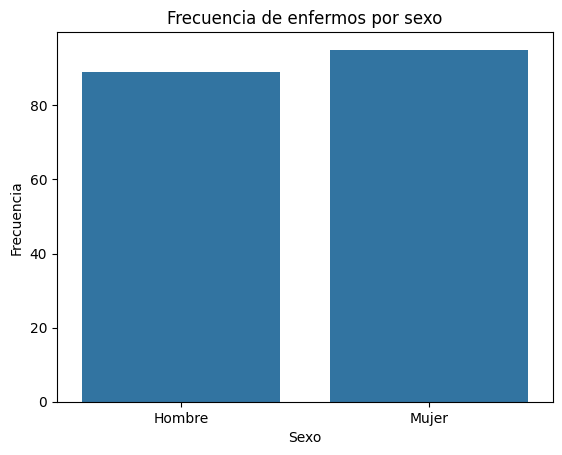

In [3]:
enfermos = df[df["Enfermo_COVID"]=="Sí"]

sn.countplot(data=enfermos, x="Sexo")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de enfermos por sexo")
plt.show()



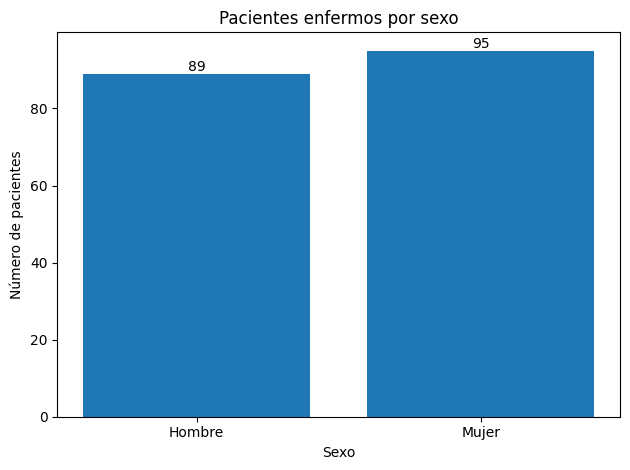

In [4]:
enfermos = df[df["Enfermo_COVID"] == "Sí"]
conteo = (
    enfermos["Sexo"].value_counts().reindex(["Hombre", "Mujer"]).fillna(0).astype(int)
)
plt.figure()
plt.bar(conteo.index, conteo.values)
plt.title("Pacientes enfermos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de pacientes")
for x, y in zip(conteo.index, conteo.values):
    plt.text(x, y, str(y), ha="center", va="bottom")
plt.tight_layout()
plt.show()


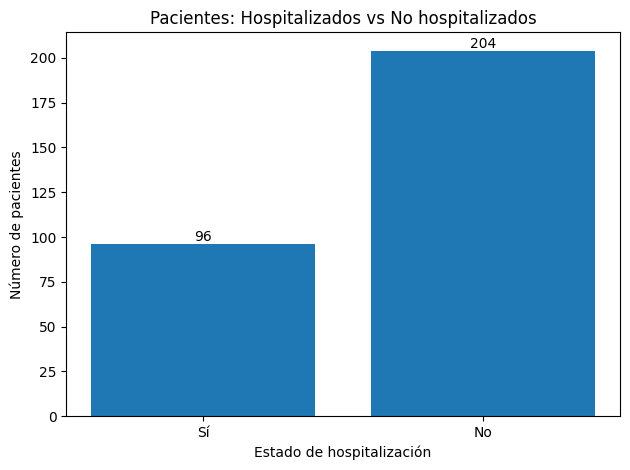

In [5]:
conteo = (
    df["Hospitalizado"].value_counts().reindex(["Sí", "No"]).fillna(0).astype(int)
)
plt.figure()
plt.bar(conteo.index, conteo.values)
plt.title("Pacientes: Hospitalizados vs No hospitalizados")
plt.xlabel("Estado de hospitalización")
plt.ylabel("Número de pacientes")
for x, y in zip(conteo.index, conteo.values):
    plt.text(x, y, str(y), ha="center", va="bottom")

plt.tight_layout()
plt.show()


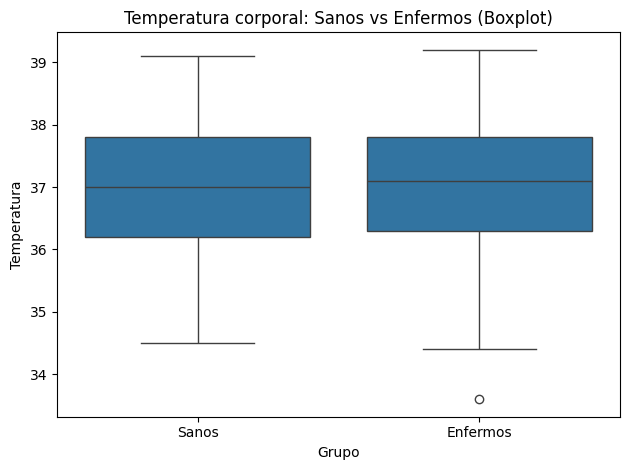

In [13]:
tmp = df[df["Enfermo_COVID"].isin(["Sí", "No"])].copy()
tmp = tmp[tmp["Temperatura"].notna()]
tmp["Grupo"] = tmp["Enfermo_COVID"].map({"Sí": "Enfermos", "No": "Sanos"})
plt.figure()
sn.boxplot(data=tmp, x="Grupo", y="Temperatura", order=["Sanos", "Enfermos"])
plt.title("Temperatura corporal: Sanos vs Enfermos (Boxplot)")  
plt.xlabel("Grupo")
plt.ylabel("Temperatura")
plt.tight_layout()
plt.show()

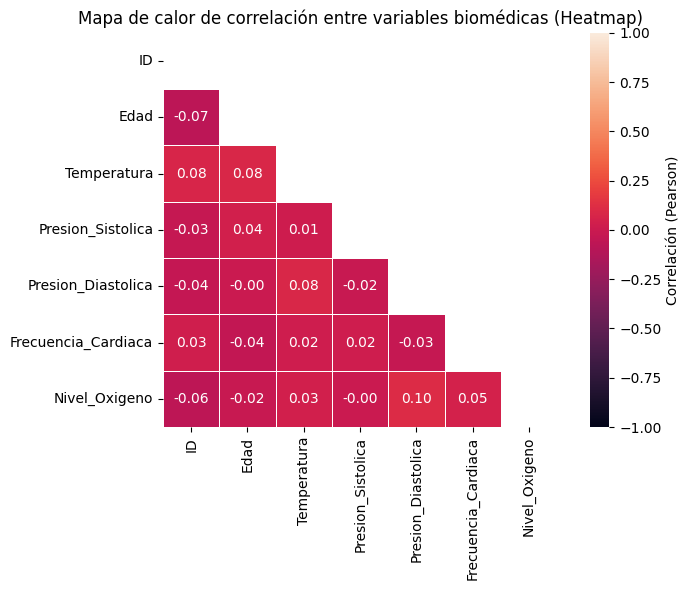

In [15]:
bio = df.select_dtypes(include=[np.number]).copy()
bio = bio.dropna(axis=1, how='all')
corr = bio.corr(method="pearson")
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sn.heatmap(
    corr,
    mask=mask,         
    annot=True,        
    fmt=".2f",
    vmin=-1, vmax=1,
    linewidths=.5,
    square=True,
    cbar_kws={"label": "Correlación (Pearson)"}
)
plt.title("Mapa de calor de correlación entre variables biomédicas (Heatmap)")
plt.tight_layout()
plt.show()

Conclusión final:
En conclusion en esta muestra, el total de enfermos supera al de sanos, al desglosar por sexo, se observan diferencias en la proporción de enfermos dentro de cada grupo (Hombre/Mujer). En hospitalización, predominan los no hospitalizados, pero al analizar por sexo se aprecian variaciones en la tasa de hospitalización relativa. Asimismo, al condicionar la hospitalización únicamente a pacientes enfermos, se identifican diferencias por sexo en la probabilidad de ser hospitalizado, lo que sugiere que el sexo podría influir tanto en la ocurrencia de enfermedad como en la severidad (medida por hospitalización) dentro de esta base. Estas observaciones deben interpretarse con cautela (tamaño muestral y posibles nulos), pero orientan a profundizar con pruebas estadísticas y más variables clínicas.